In [ ]:
# Importing necessary libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:

# Load the dataset
file_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)

# Handle missing values: Fill missing BMI with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# One-hot encoding for categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Selecting numerical columns to normalize
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying Min-Max scaling to the numerical columns
df_encoded[numerical_columns] = pd.DataFrame(
    scaler.fit_transform(df_encoded[numerical_columns]),
    columns=numerical_columns
)

# Display the first few rows of the normalized dataframe
print(df_encoded.head())


      id       age  hypertension  heart_disease  avg_glucose_level       bmi  \
0   9046  0.816895             0              1           0.801265  0.301260   
1  51676  0.743652             0              0           0.679023  0.203895   
2  31112  0.975586             0              1           0.234512  0.254296   
3  60182  0.597168             0              0           0.536008  0.276060   
4   1665  0.963379             1              0           0.549349  0.156930   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1         True         False              True   
1       1        False         False              True   
2       1         True         False              True   
3       1        False         False              True   
4       1        False         False              True   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   Fals

<ipython-input-30-3c2a569a5d18>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [ ]:
# Split the data into features (X) and target (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

In [ ]:
# Split the data into training (70%), validation (20%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

In [ ]:
# Step 2: Neural Network Design
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dropout(0.3),  # Dropout layer for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.3),  # Dropout layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 3: Model Training and Evaluation
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model with early stopping
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9520 - loss: 0.1933 - val_accuracy: 0.9513 - val_loss: 0.1946
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9489 - loss: 0.2016 - val_accuracy: 0.9513 - val_loss: 0.1946
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.2024 - val_accuracy: 0.9513 - val_loss: 0.1946
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9501 - loss: 0.7263 - val_accuracy: 0.9513 - val_loss: 0.1946
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.2309 - val_accuracy: 0.9513 - val_loss: 0.1946


In [ ]:
# Step 4: Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


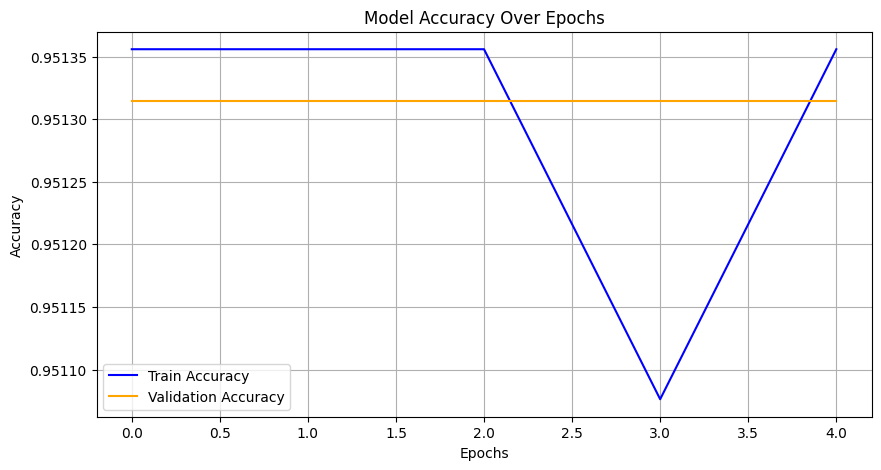

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

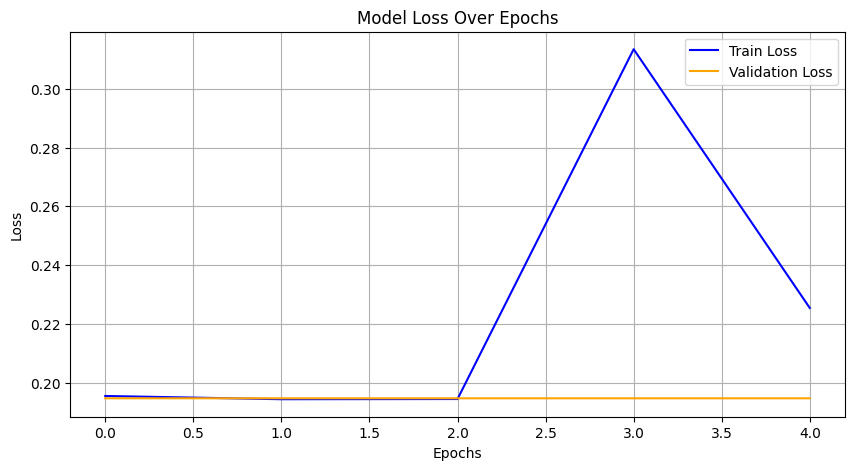

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [12]:
# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"]))

Classification Report:

              precision    recall  f1-score   support

   No Stroke       0.00      0.00      0.00       481
      Stroke       0.05      1.00      0.09        25

    accuracy                           0.05       506
   macro avg       0.02      0.50      0.05       506
weighted avg       0.00      0.05      0.00       506



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
